# Transformación de datos

En *notebooks* anteriores aprendimos a utilizar marcadores y codificaciones visuales para representar registros individuales de datos. Aquí exploraremos métodos para *transformar* datos, incluyendo el uso de agregados (*aggregates*) para resumir múltiples registros. La transformación de datos es una parte integral de la visualización: la elección de las variables a mostrar y su nivel de detalle es tan importante como la elección de codificaciones visuales apropiadas. ¡Después de todo, no importa cuán bien escogidas sean tus codificaciones visuales si estás mostrando la información incorrecta!

Mientras trabajas en este módulo, te recomendamos que abras la documentación [Altair Data Transformations](https://altair-viz.github.io/user_guide/transform.html) en otra pestaña. Será un recurso útil si en algún momento deseas obtener más detalles o ver qué otras transformaciones están disponibles.

_Este notebook es una traduccion y modificación del notebook **"Introduction to Vega-Lite / Altair"** , el cual es parte de [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

_Todos los notebooks en español se encuentran en: [Altair en Simplificando Datos](https://github.com/SimplificandoDatos/Altair)_

In [1]:
import pandas as pd
import altair as alt

## El conjunto de datos de películas

Trabajaremos con una base de datos sobre películas, tomada de la colección [vega-datasets] (https://vega.github.io/vega-datasets/). Los datos incluyen variables como el nombre de la película, el director, el género, la fecha de estreno, las calificaciones y los ingresos brutos. Sin embargo, _ten cuidado al trabajar con estos datos_: las películas son de años de muestreados desigualmente, usando datos combinados de múltiples fuentes. ¡Si profundizas, encontrarás problemas con los valores faltantes e incluso algunos errores sutiles! Sin embargo, los datos deberían resultar interesantes de explorar....

Recuperemos la URL del archivo de datos JSON del paquete vega_datasets, y luego leamos los datos en un *data frame* de Pandas para que podamos inspeccionar su contenido.

In [2]:
from vega_datasets import data as vega_data
movies_url = vega_data.movies.url
movies = pd.read_json(movies_url)

¿Cuántas filas (registros) y columnas (campos) hay en el conjunto de datos de las películas?

In [3]:
movies.shape

(3201, 16)

Ahora demos un vistazo a las primeras 5 filas de la tabla para tener una idea de los campos y tipos de datos....

In [4]:
movies.head(5)

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


## Histogramas

Comenzaremos nuestro recorrido por la *transformación* haciendo _agrupamiento (binning)_ de datos en grupos discretos y _contando_ registros para resumirlos. Las gráficas resultantes se conocen como [_histogramas_](https://es.wikipedia.org/wiki/Histograma).

Veamos primero los datos no agregados: una gráfica de dispersión que muestra las calificaciones de películas en Rotten Tomatoes frente a las de los usuarios de IMDB. Pasaremos los datos a Altair por medio de la URL de los datos de las películas al método `Chart`. (También podemos pasar el *data frame* de Pandas directamente para obtener el mismo resultado.) Luego podemos codificar los campos de calificación de Rotten Tomatoes e IMDB usando los canales `x` y `y`:

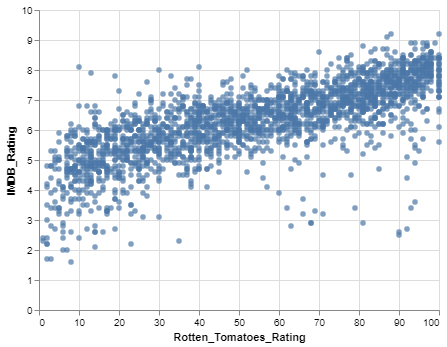

In [5]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q'),
    alt.Y('IMDB_Rating:Q')
)

Para resumir estos datos, podemos *agrupar (bin)* un campo de datos para clasificar valores numéricos en grupos discretos. Aquí agrupamos a lo largo del eje x añadiendo `bin=True` al canal de codificación `x`. El resultado es un conjunto de diez clasificaciones de igual separación, cada uno de los cuales corresponde a un rango de diez puntos de calificación.

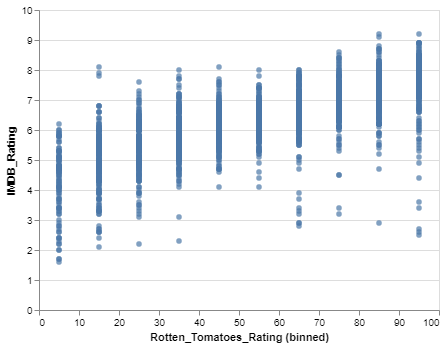

In [6]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Y('IMDB_Rating:Q')
)

Al usar `bin=True` se utiliza la configuración de *agrupamiento (binning)* por defecto, pero podemos ejercer más control si lo deseamos. En su lugar, fijemos el número máximo de grupos (`maxbins`) en 20, lo que duplicará el número de ellos. Ahora cada grupo corresponde a un rango de cinco puntos de clasificación.

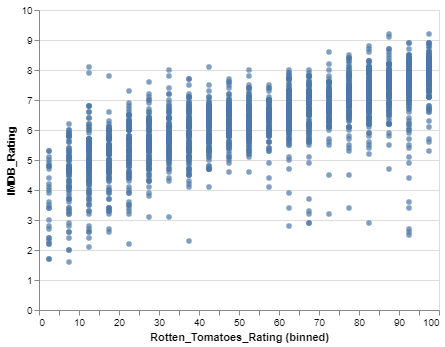

In [7]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q')
)

Con los datos agrupados, vamos a resumir la distribución de las calificaciones de Rotten Tomatoes. Nos olvidaremos de las clasificaciones de IMDB por ahora y en su lugar usaremos el canal de codificación `y` para mostrar un conteo (`count`) agregado de registros, de modo que la posición vertical de cada punto indique el número de películas por cada categoría de calificación de Rotten Tomatoes.

Como el agregado `count` cuenta el número de registros totales en cada ubicación independientemente de los valores del campo, no es necesario incluir un nombre de campo en la codificación `y`.

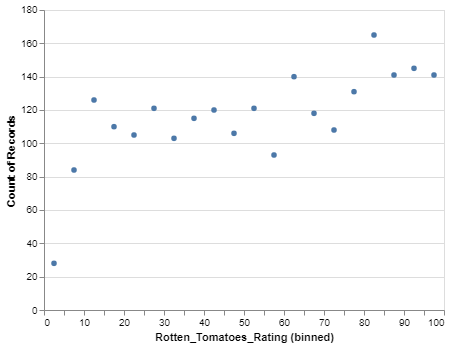

In [8]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

Para llegar a un histograma estándar, cambiemos el tipo de marcador de `circle` a `bar`:

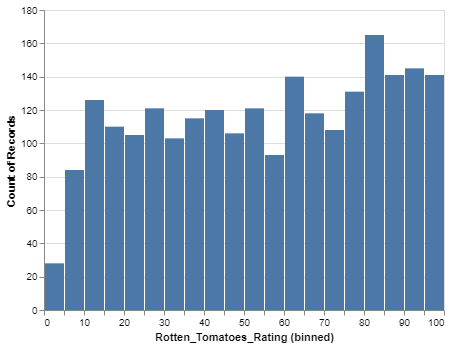

In [9]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

_Ahora podemos examinar la distribución de las calificaciones más claramente: podemos ver menos películas en el extremo de calificaciones bajas y un poco más en el extremo de las altas, pero una distribución generalmente uniforme en el resto. Las calificaciones de Rotten Tomatoes se determinan tomando en cuenta los juicios de los críticos de cine y calculando el porcentaje de críticas positivas. Parece que este enfoque hace un buen trabajo al utilizar el rango completo de valores de calificación._

Del mismo modo, podemos crear un histograma para las calificaciones de IMDB cambiando el campo en el canal de codificación `x`:

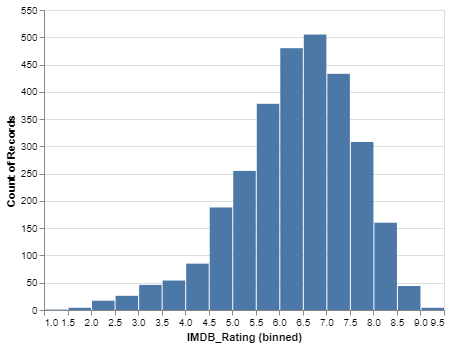

In [10]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

_En contraste con la distribución más uniforme que vimos antes, las calificaciones de IMDB muestran una distribución en forma de campana (aunque con [asimetría negativa](https://es.wikipedia.org/wiki/Asimetría_estadística)). Las clasificaciones de IMDB están formadas por el promedio de las puntuaciones (que van de 1 a 10) proporcionadas por los usuarios del sitio. Podemos ver que esta forma de medición lleva a una forma diferente que las clasificaciones de Rotten Tomatoes. También vemos que la moda de la distribución está entre 6.5 y 7: la gente generalmente disfruta viendo películas, lo que puede explicar el sesgo positivo._

Ahora volvamos a nuestro gráfico de dispersión de las calificaciones de Rotten Tomatoes y de IMDB. Esto es lo que sucederá si agrupamos (*bin*) *ambos* ejes de nuestra gráfica original.

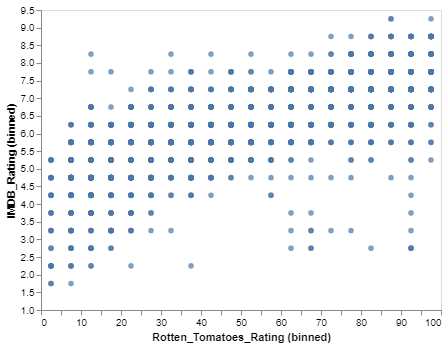

In [11]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
)

Los detalles se pierden debido al *overplotting*, con muchos puntos dibujados directamente uno encima del otro.

Para crear un histograma bidimensional podemos añadir un agregado (*aggregate*) de conteo (`count`) como lo hicimo anteriormente. Como ya están ocupados los canales de codificación `x` y `y`, debemos utilizar un canal de codificación diferente para mostrar el resultado del conteo. A continuación se muestra el resultado de utilizar un área circular añadiendo un canal de codificación *size*.

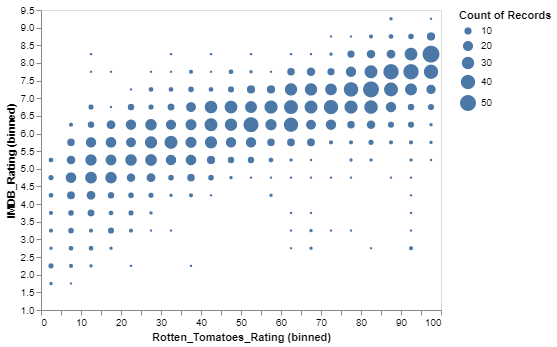

In [12]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Size('count()')
)

Alternativamente, podemos codificar los conteos usando el canal `color` y cambiar el tipo de marcador a `bar`. El resultado es un histograma bidimensional en forma de un [*mapa de calor*](https://www.ingeniovirtual.com/tipos-de-graficos-y-diagramas-para-la-visualizacion-de-datos/#Mapa_de_calor_con_matriz).

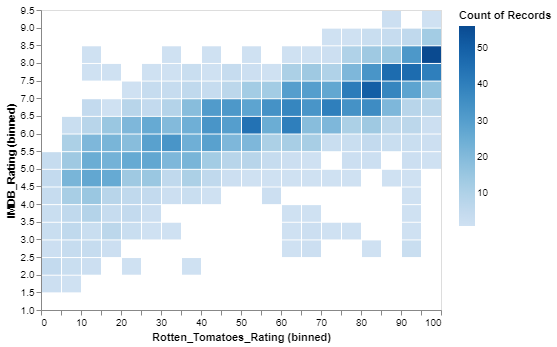

In [13]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Color('count()')
)

Compare los histogramas 2D basados en *tamaño* y *color* anteriores. ¿Qué codificación crees de mayor utilidad? ¿Por qué? ¿En cuál gráfico se compara con mayor precisión la magnitud de los valores individuales? ¿En cuál gráfico se ve con mayor precisión la densidad general de las calificaciones?

## Agregación (*Aggregation*)

Los conteos son sólo un tipo de agregado. También podemos calcular resúmenes usando medidas como promedio (`average`), mediana (`median`), mínimo (`min`) o máximo (`max`). La documentación de Altair incluye el [conjunto completo de funciones de agregación disponibles](https://altair-viz.github.io/user_guide/encoding.html#encoding-aggregates).

¡Veamos algunos ejemplos!

### Promedio y ordenamiento

_¿Diferentes géneros de películas reciben consistentemente diferentes calificaciones de quienes critican?_ Como primer paso para responder a esta pregunta, podríamos examinar el [*promedio* (también conocido como la *media aritmética*)](https://es.wikipedia.org/wiki/Media_aritmética) de las calificaciones para cada género de película.

Visualicemos el género a lo largo del eje `y` y grafiquemos el promedio (`average`) de las clasificaciones de Rotten Tomatoes a lo largo del eje `x`.

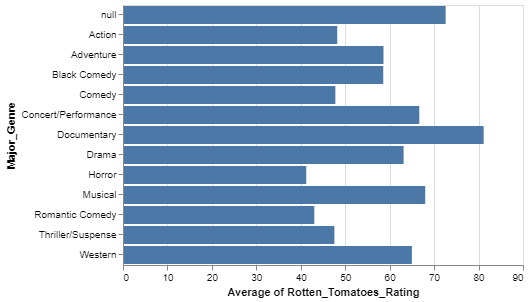

In [14]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N')
)

_Parece haber alguna variación interesante, pero mirar los datos en orden alfabético de los géneros no es muy útil para clasificar las críticas._

Para una imagen más clara, ordenemos los géneros en sentido descendente de su puntuación media. Para ello, añadiremos un parámetro `sort` al canal de codificación `y`, indicando que deseamos ordenar por el *promedio* (`op`, la operación agregada) de la calificación de Tomates Rotten (el `field`) en orden (`order`) descendente.

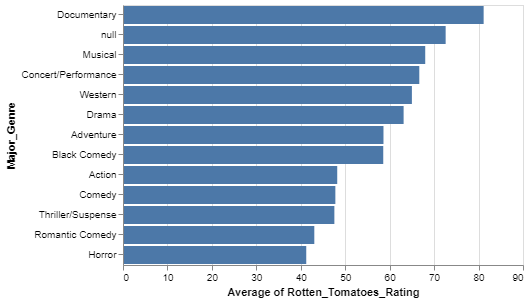

In [15]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='average', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

_La gráfica ordenada sugiere que quienes critican tienen en alta estima a los documentales, musicales, películas del oeste y dramas, pero desprecian las comedias románticas y las películas de terror... ¿Y a quién no le gustan las películas "null"?._

### Mediana y el rango intercuantílico

Aunque los promedios son una forma común de resumir los datos, a veces pueden inducir a error. Por ejemplo, valores muy grandes o muy pequeños ([*atípicos (outliers)*](https://es.wikipedia.org/wiki/Valor_atípico)) podrían sesgar el promedio. Para asegurarnos, también podemos comparar los géneros de acuerdo a la [mediana (*median*)](https://en.wikipedia.org/wiki/Median) de las calificaciones.

La mediana es un punto que divide los datos de manera uniforme, de manera que la mitad de los valores son inferiores a la mediana y la otra mitad son mayores. La mediana es menos sensible a los valores atípicos, por lo que se la denomina [*estadística robusta*](https://es.wikipedia.org/wiki/Estadística_robusta). Por ejemplo, el aumento arbitrario del valor más alto de la calificación no hará que cambie la mediana.

Actualicemos nuestra gráfica para usar el agregado `median` y ordenarla de esta manera:

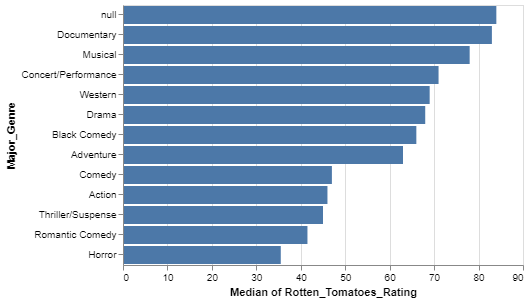

In [16]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('median(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='median', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

_Vemos que algunos de los géneros con promedios similares han cambiado de lugar (las películas de género desconocido, o "null", ahora se clasifican como las más altas), pero los grupos en general se han mantenido estables. Las películas de terror siguen recibiendo poco amor de lxs profesionales del cine que realizan las críticas._

Es una buena idea mantenerse escéptico al ver las estadísticas agregadas. Hasta ahora sólo hemos mirado *estimaciones puntuales*. No hemos examinado cómo varían las calificaciones dentro de un género.

Visualicemos la variación entre las clasificaciones para añadir algún matiz a nuestras calificaciones. Aquí codificaremos el [*rango intercuantílico* (IQR)](https://es.wikipedia.org/wiki/Rango_intercuartílico) para cada género. El IQR es el rango que abarca la mitad de los valores de los datos. Un [*cuartil*](https://es.wikipedia.org/wiki/Cuartil) contiene el 25% de los valores de los datos. 

Para visualizar los rangos, utilizamos los canales de codificación `x` y `x2` para indicar los puntos de inicio y final. Usamos las funciones agregadas `q1` (el primer cuartil como límite inferior) y `q3` (el tercer cuartil como límite superior) para obtener el rango intercuartílico. (En caso de que te lo estés preguntando, *q2* sería la mediana.)

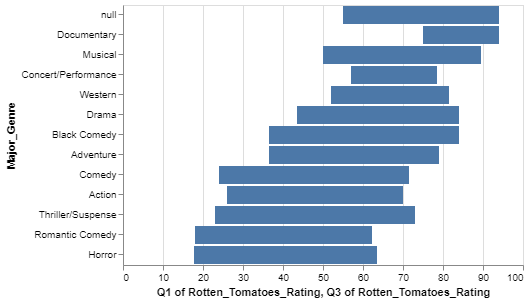

In [17]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('q1(Rotten_Tomatoes_Rating):Q'),
    alt.X2('q3(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='median', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

### Unidades de tiempo

_Ahora vamos a hacer una pregunta completamente diferente: ¿Las ganancias de taquilla varían según la temporada?_

Para obtener una primera respuesta, grafiquemos los ingresos brutos medios en los Estados Unidos por mes.

Para hacer este gráfico, utilizaremos la transformación `timeUnit` para asignar las fechas de publicación al mes del año (`month`). El resultado es similar al *binning*, pero usando intervalos de tiempo significativos. Otras unidades de tiempo válidas incluyen año (`year`), trimestre (`quarter`), fecha (`date`) -día numérico en el mes-, día (`day`) -día de la semana-, y horas (`hours`), así como unidades compuestas tales como `yearmonth` o `hoursminutes`. Consulte la documentación de Altair para obtener una [lista completa de las unidades de tiempo](https://altair-viz.github.io/user_guide/transform.html#timeunit-transform).

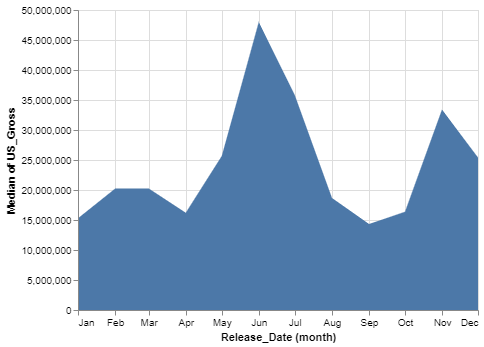

In [18]:
alt.Chart(movies_url).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(US_Gross):Q')
)

_Si observamos la gráfica resultante, la mediana de las ventas de películas en los Estados Unidos parece aumentar en torno a la temporada de éxitos de taquilla de verano y el período de vacaciones de fin de año. Por supuesto, la gente en todo el mundo (no sólo en Estados Unidos) va al cine. ¿Surge un patrón similar para los ingresos brutos mundiales?_

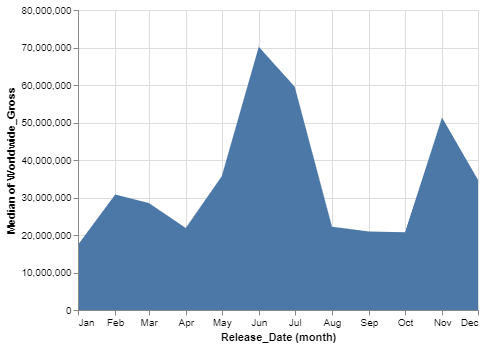

In [19]:
alt.Chart(movies_url).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(Worldwide_Gross):Q')
)

_¡Sí!_

## Transformación de datos avanzada

Los ejemplos anteriores utilizan transformaciones (*bin*, *timeUnit*, *aggregate*, *sort*) que se definen en relación con un canal de codificación. Sin embargo, a veces es posible que desee aplicar una cadena de transformaciones múltiples antes de la visualización, o utilizar transformaciones que no se integran en las definiciones de codificación. Para estos casos, Altair y Vega-Lite soportan transformaciones de datos definidas separadamente de las codificaciones. Estas transformaciones se aplican a los datos *antes* de considerar cualquier codificación.

Podríamos también realizar transformaciones usando Pandas directamente, y luego visualizar el resultado. Sin embargo, el uso de las transformaciones incorporadas permite que nuestras visualizaciones se publiquen más fácilmente en otros contextos; por ejemplo, exportar el JSON de Vega-Lite para utilizarlo en una interfaz web independiente. Veamos las transformaciones incorporadas soportadas por Altair, tales como calcular (`calculate`), filtrar (`filter`), agregar (`aggregate`) y ventana (`window`).

### Calcular

_Piensa en nuestra comparación de los ingresos brutos en Estados Unidos y en el resto del mundo. ¿Los ingresos mundiales no incluyen a los EE.UU.? (De hecho, sí.) ¿Cómo podríamos tener una mejor idea de las tendencias fuera de los EE.UU.?_

Con la transformación calcular (`calculate`) podemos derivar nuevos campos. Aquí queremos restar el bruto de EE.UU. del bruto mundial. La transformación `calculate` toma una [cadena de expresión de Vega](https://vega.github.io/vega/docs/expressions/) para definir una fórmula sobre un único registro. Las expresiones de Vega utilizan sintaxis JavaScript. El prefijo `datum.` accede a un valor de campo en el registro de entrada.

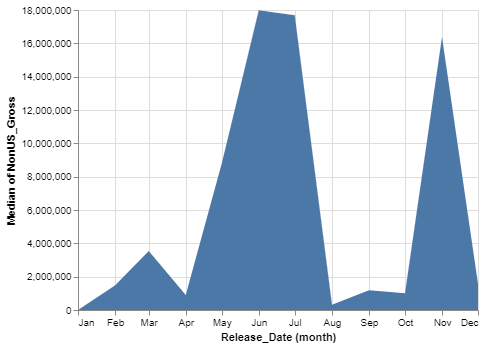

In [20]:
alt.Chart(movies).mark_area().transform_calculate(
    NonUS_Gross='datum.Worldwide_Gross - datum.US_Gross'
).encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(NonUS_Gross):Q')
)

_Se nota que las tendencias estacionales se mantienen fuera de los EE.UU., pero con un descenso más pronunciado en los meses que no son pico._

### Filtrar

La transformación filtrar (`filter`) crea una nueva tabla con un subconjunto de los datos originales, eliminando las filas que no cumplen con una prueba de [*predicado*](https://es.wikipedia.org/wiki/Predicado_(l%C3%B3gica)) proporcionada. Similar a la transformación `calculate`, los predicados del filtro se expresan usando el [lenguaje de expresión de Vega](https://vega.github.io/vega/docs/expressions/).

A continuación añadimos un filtro para limitar nuestra gráfica de dispersión inicial de IMDB vs. Rotten Tomatoes a sólo películas con el género principal de "Romantic Comedy".

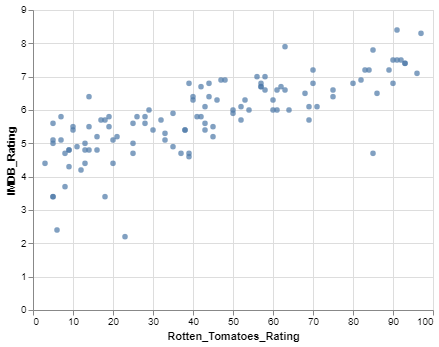

In [21]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q'),
    alt.Y('IMDB_Rating:Q')
).transform_filter('datum.Major_Genre == "Romantic Comedy"')

_¿Cómo cambia la gráfica si filtramos para ver otros géneros? Edite la expresión del filtro para averiguarlo._

Ahora filtraremos para ver las películas estrenadas antes de 1970.

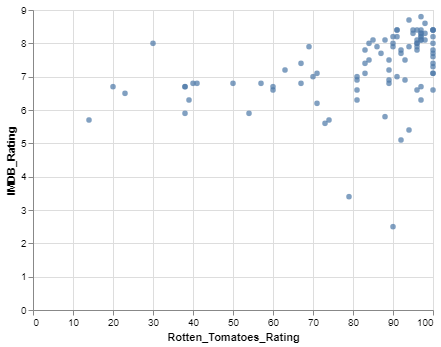

In [22]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q'),
    alt.Y('IMDB_Rating:Q')
).transform_filter('year(datum.Release_Date) < 1970')

_¡Parecen tener un puntaje inusualmente alto! ¿Son las películas más antiguas simplemente mejores, o hay un [sesgo de selección](https://en.wikipedia.org/wiki/Selection%5Fbias) hacia incluir las películas más antiguas y mejor valoradas en este conjunto de datos?_

### Agregados (Aggregate)

Ya hemos visto transformaciones "agregadas" (`aggregate`) como "contar" (`count`) y "promedio" (`average`) en el contexto de la codificación de canales. También podemos especificar los agregados por separado, como un paso de preprocesamiento para otras transformaciones (como en los ejemplos de transformación de "ventanas" -`window`- que se muestran a continuación). El resultado de una transformación "agregada" (`aggregate`) es una nueva tabla de datos con registros que contienen tanto los campos "agrupados por" (`groupby`) como las medidas "agregadas" (`aggregate`) que fueron calculadas.

Recrearemos nuestra gráfica de calificaciones promedio por género, pero esta vez usando una transformación"agregada" (`aggregate`) separada. La tabla de salida de la transformación agregada contiene 13 filas, una para cada género.

Para ordenar el eje `y` debemos incluir una operación agregada requerida en nuestras instrucciones de ordenamiento. Aquí usamos el operador `max`, que funciona bien porque solo hay un registro de salida por género. Podríamos usar el operador `min` de manera similar y resultaría la misma gráfica.

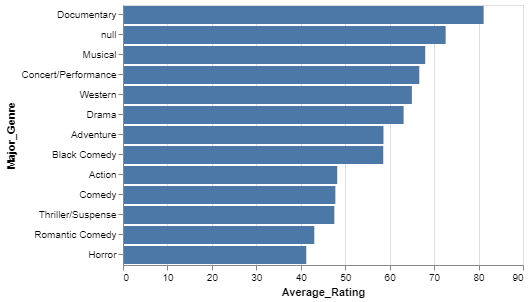

In [23]:
alt.Chart(movies_url).mark_bar().transform_aggregate(
    groupby=['Major_Genre'],
    Average_Rating='average(Rotten_Tomatoes_Rating)'
).encode(
    alt.X('Average_Rating:Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='max', field='Average_Rating', order='descending'
      )
    )
)

### Ventana (*Window*)

La transformación de "ventana" (`window`) realiza cálculos sobre grupos ordenados de registros de datos. Las transformaciones de ventana (*window transforms*) son muy poderosas, soportando tareas tales como clasificación (*ranking*), análisis de adelanto/atraso (*leads/lag*), totales acumulativos y ejecutando sumas o promedios. Los valores calculados por una transformación de "ventana" (`window`) se vuelven a escribir en la tabla de datos de entrada como nuevos campos. Las operaciones de ventana incluyen las operaciones agregadas que hemos visto anteriormente, así como operaciones especializadas como `rank`, `row_number`, `lead`, y `lag`. La documentación de Vega-Lite enumera [todas las operaciones válidas en ventanas](https://vega.github.io/vega-lite/docs/window.html#ops).

Un caso de uso de una transformación `window` es calcular listas del tipo *top-k*. Vamos a graficar el top 20  de lo/as directore/as en términos del ingreso total mundial bruto.

Primero usamos una transformación `filter` para eliminar registros de los cuales no conocemos al/a director/a. ¡De lo contrario, el director/a `null` dominaría la lista! A continuación, aplicamos un `aggregate` para resumir el ingreso bruto mundial de todas las películas, agrupadas por director/a. En este punto podríamos usar un gráfico de barras ordenado, pero acabaríamos con cientos y cientos de directore/as. ¿Cómo podemos limitar a que se muestren solo lo/as 20 primero/as?

La transformación `window` nos permite determinar lo/as directore/as superiores calculando su orden según una clasificación. Dentro de nuestra definición de transformación `window` podemos "ordenar" (`sort`) por ingreso bruto y usar la operación `rank` para calcular las puntuaciones de rango de acuerdo con ese orden de clasificación. A continuación, podemos añadir una subsiguiente transformación `filter` para limitar los datos a registros con un valor de rango igual o menor a 20.

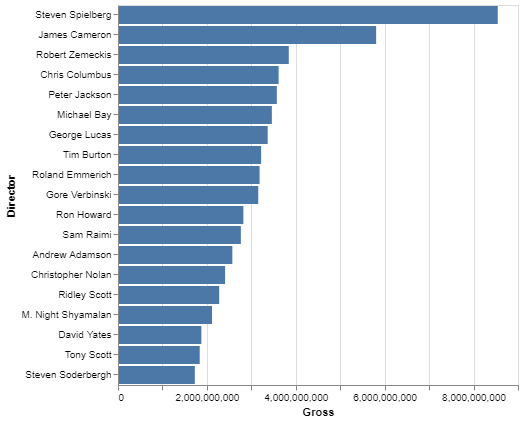

In [24]:
alt.Chart(movies_url).mark_bar().transform_filter(
    'datum.Director != null'
).transform_aggregate(
    Gross='sum(Worldwide_Gross)',
    groupby=['Director']
).transform_window(
    Rank='rank()',
    sort=[alt.SortField('Gross', order='descending')]
).transform_filter(
    'datum.Rank < 20'
).encode(
    alt.X('Gross:Q'),
    alt.Y('Director:N', sort=alt.EncodingSortField(
        op='max', field='Gross', order='descending'
    ))
)

_¡Vemos que Steven Spielberg ha tenido mucho éxito en su carrera! Sin embargo, mostrar el resultado de la suma podría favorecer a los directores que han tenido carreras más largas y por lo tanto han hecho más películas y por consiguiente más dinero. ¿Qué sucede si cambiamos la elección de la operación de agregados? ¿Quién es el director más exitoso en términos de "media" o "mediana" del ingreso bruto por película?_

Aquí te muestro en términos del promedio, trata de obtenerlo para la mediana.

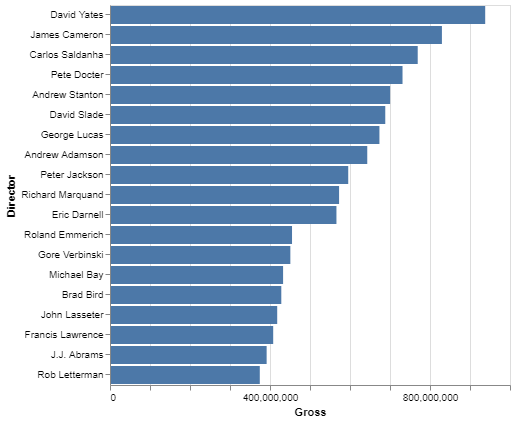

In [25]:
alt.Chart(movies_url).mark_bar().transform_filter(
    'datum.Director != null'
).transform_aggregate(
    Gross='average(Worldwide_Gross)',
    groupby=['Director']
).transform_window(
    Rank='rank()',
    sort=[alt.SortField('Gross', order='descending')]
).transform_filter(
    'datum.Rank < 20'
).encode(
    alt.X('Gross:Q'),
    alt.Y('Director:N', sort=alt.EncodingSortField(
        op='max', field='Gross', order='descending'
    ))
)

Anteriormente en este *notebook* observamos histogramas, que se aproximan a la [*función de densidad de probabilidad*](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) de un conjunto de valores. Un enfoque complementario es examinar la [*distribución acumulativa*](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Por ejemplo, piense en un histograma en el que cada cajón (*bin*) incluye no sólo su propio recuento sino también los recuentos de todos los cajones anteriores &mdash; el resultado es un _total acumulado_, con el último cajón conteniendo el número total de registros. Un gráfico acumulativo nos muestra directamente, para un valor de referencia dado, cuántos valores de datos son menores o iguales a ese valor de referencia.

Como ejemplo concreto, veamos la distribución acumulativa de películas por tiempo de duración (en minutos). Sólo un subconjunto de registros incluye información sobre el tiempo de duración, por lo que primero *filtramos* (`filter`) el subconjunto de películas para las que tenemos los tiempos de duración. A continuación, aplicamos un *agregado* (`aggregate`) para contar el número de películas agrupándolas por su duración (utilizando implícitamente "bins" de 1 minuto cada uno). Luego usamos una transformación de *ventana* (`window`) para calcular un acumulado total del conteo en los cajones, ordenados ascendentemente según el tiempo de duración.

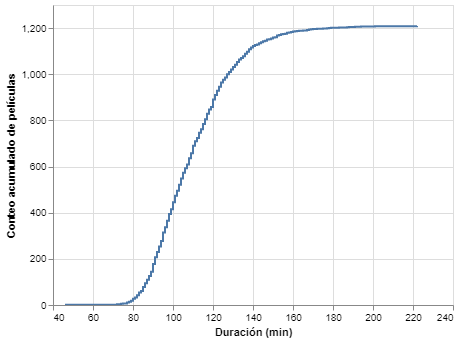

In [26]:
alt.Chart(movies_url).mark_line(interpolate='step-before').transform_filter(
    'datum.Running_Time_min != null'
).transform_aggregate(
    groupby=['Running_Time_min'],
    Count='count()',
).transform_window(
    Cumulative_Sum='sum(Count)',
    sort=[alt.SortField('Running_Time_min', order='ascending')]
).encode(
    alt.X('Running_Time_min:Q', axis=alt.Axis(title='Duración (min)')),
    alt.Y('Cumulative_Sum:Q', axis=alt.Axis(title='Conteo acumulado de películas'))
)

_Examinemos la distribución acumulativa de la duración de las películas. Podemos ver que las películas de menos de 110 minutos constituyen aproximadamente la mitad de todas las películas para las que tenemos tiempo de duración. Vemos una acumulación constante de películas entre 90 minutos y 2 horas, después de lo cual la distribución comienza a disminuir. ¡Aunque raro, el conjunto de datos contiene varias películas de más de 3 horas de duración._

## Resumen

¡Sólo hemos rascado la superficie de lo que las transformaciones de datos pueden hacer! Para más detalles, incluyendo todas las transformaciones disponibles y sus parámetros, consulte la documentación [Altair data transformation documentation](https://altair-viz.github.io/user_guide/transform.html).

A veces necesitará realizar una transformación de datos significativa para preparar sus datos antes de usar las herramientas de visualización. Para involucrase en [_procesamiento de datos (data wrangling)_](https://es.wikipedia.org/wiki/Procesamiento_de_datos) aquí mismo en Python, puedes usar la [Biblioteca Pandas](https://pandas.pydata.org/).

**Nota de Simplificando Datos: Para comenzar a trabajar con Pandas también puedes ver mis videos que se encuentran en la siguiente lista de reproducción**
[Análisis exploratorio de datos](https://youtu.be/2v19SsG07mM)